## M08 Machine Learning: Classification Challenge

#### 1. Import necessary libraries

In [1]:
# !pip install ucimlrepo

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

#### 2. Load the heart disease dataset

In [3]:
heart_disease_data = fetch_ucirepo(id=45)

X = heart_disease_data.data.features
y = heart_disease_data.data.targets

all_columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs','num']
feature_columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs']

# Convert to pandas DataFrame

X = pd.DataFrame(X)
y = pd.DataFrame(y)

df = pd.concat([X, y], axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [4]:
df['num'].value_counts()

,count
num,
0,164
1,55
2,36
3,35
4,13


### Data Dictionary:
*  `age`: age in years
*  `sex`: sex (1 = male; 0 = female)
*  `cp`: chest pain type (0-3)
*  `trestbps`: resting blood pressure
*  `chol`: serum cholesterol in mg/dl
*  `fbs`: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
*  `target`: presence of heart disease (1 = yes, 0 = no)

In [5]:
df = df.dropna()
df = df.filter(all_columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       297 non-null    int64
 1   sex       297 non-null    int64
 2   cp        297 non-null    int64
 3   trestbps  297 non-null    int64
 4   chol      297 non-null    int64
 5   fbs       297 non-null    int64
 6   num       297 non-null    int64
dtypes: int64(7)
memory usage: 18.6 KB


In [6]:
# Display basic dataset information
print("Dataset Shape:", df.shape)
print("\nFeature Names:")
print(df.columns.tolist())
print("\nFirst few rows:")
print(df.head())

Dataset Shape: (297, 7)

Feature Names:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'num']

First few rows:
   age  sex  cp  trestbps  chol  fbs  num
0   63    1   1       145   233    1    0
1   67    1   4       160   286    0    2
2   67    1   4       120   229    0    1
3   37    1   3       130   250    0    0
4   41    0   2       130   204    0    0


In [7]:
# metadata
print(heart_disease_data.metadata)

# variable information
print(heart_disease_data.variables)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

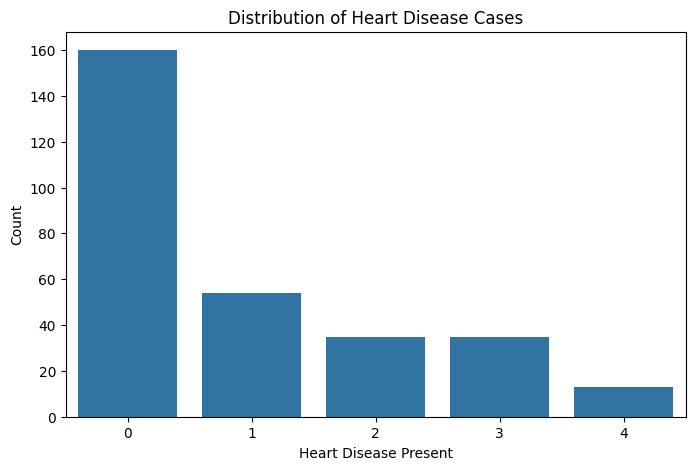

In [8]:
# Check class distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='num')
plt.title('Distribution of Heart Disease Cases')
plt.xlabel('Heart Disease Present')
plt.ylabel('Count')
plt.show()

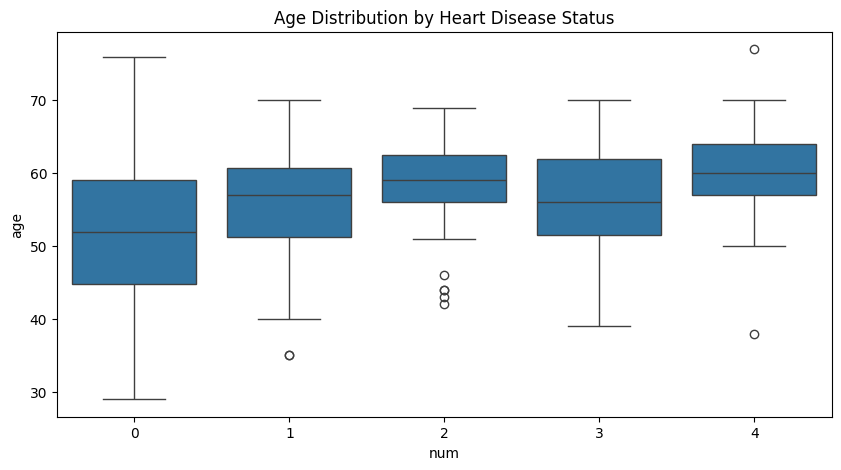

In [9]:
# Age distribution by disease status
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='num', y='age')
plt.title('Age Distribution by Heart Disease Status')
plt.show()

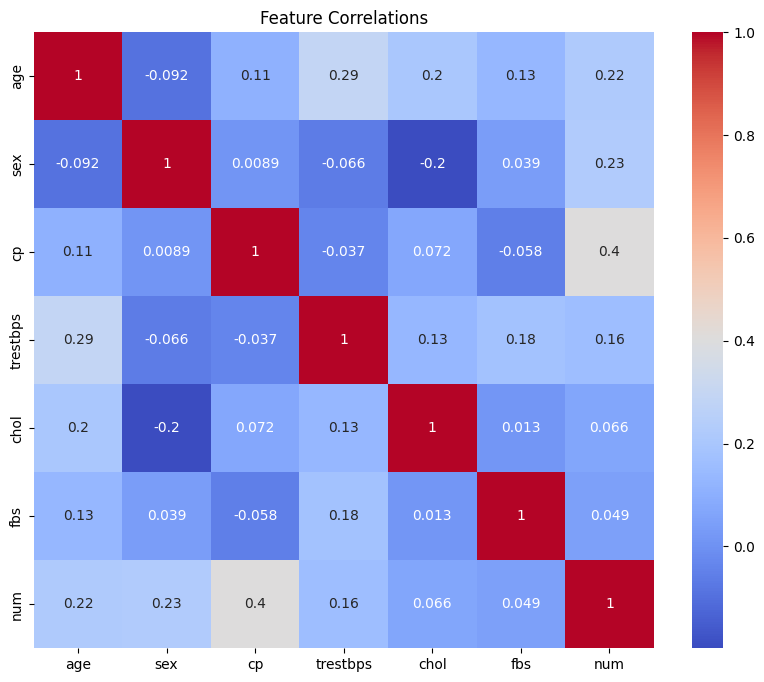

In [10]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()

#### 3. Data Pre-processing

In [11]:
# Data Preprocessing
X = df.drop('num', axis=1)
y = df['num']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (237, 6)
Testing set shape: (60, 6)


In [12]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

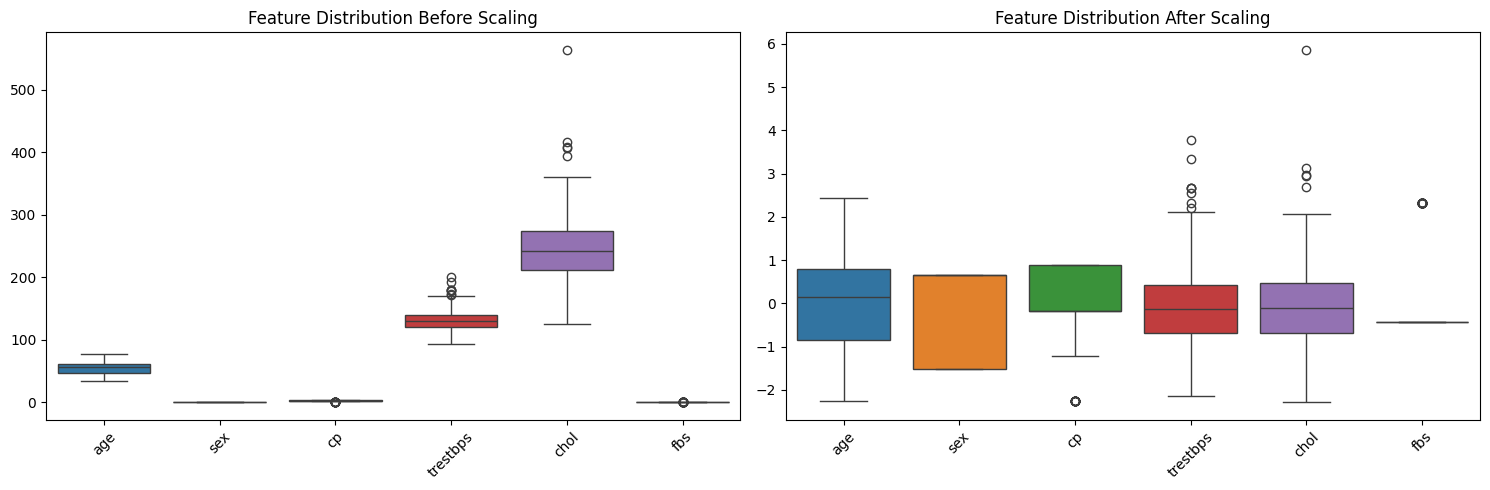

In [13]:
# Visualize scaled vs unscaled data
def plot_scaling_effect():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Before scaling
    sns.boxplot(data=X_train, ax=ax1)
    ax1.set_title('Feature Distribution Before Scaling')
    ax1.tick_params(axis='x', rotation=45)

    # After scaling
    sns.boxplot(data=pd.DataFrame(X_train_scaled, columns=feature_columns), ax=ax2)
    ax2.set_title('Feature Distribution After Scaling')
    ax2.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

plot_scaling_effect()

#### 3. KNN Model and Evaluation

In [14]:
# Model Building
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [15]:
# Make predictions
y_pred = knn.predict(X_test_scaled)

In [16]:

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")



Model Accuracy: 0.55


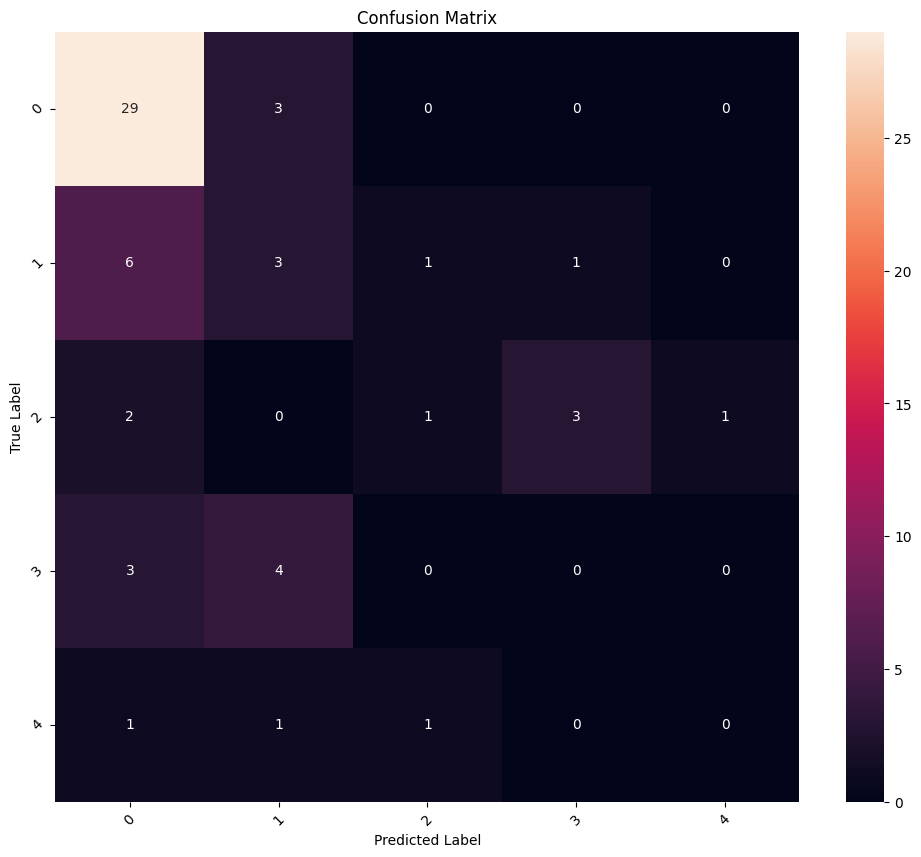

In [17]:

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d',
            xticklabels=knn.classes_,
            yticklabels=knn.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


In [18]:

# Display classification report
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred,
#                           target_names=knn.classes_))

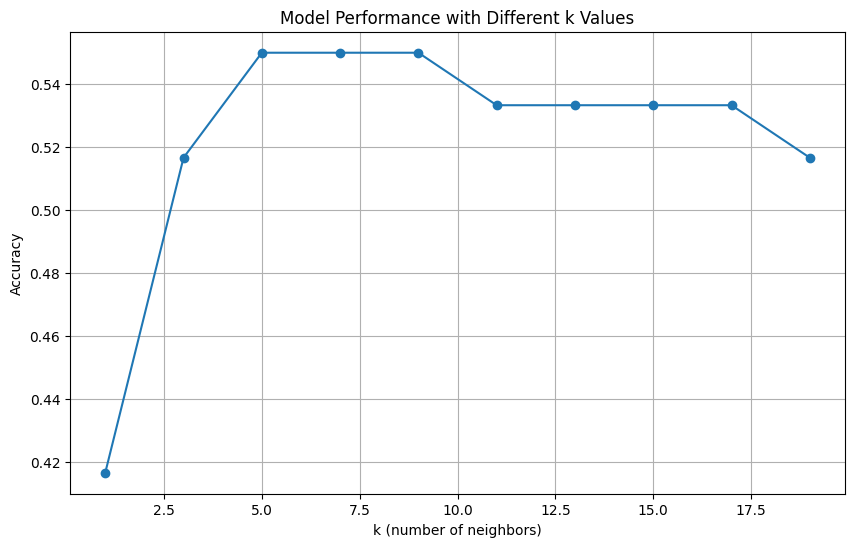

In [19]:
# Analyze model performance for different k values
k_range = range(1, 20, 2)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    scores.append(accuracy_score(y_test, knn.predict(X_test_scaled)))

plt.figure(figsize=(10, 6))
plt.plot(k_range, scores, marker='o')
plt.title('Model Performance with Different k Values')
plt.xlabel('k (number of neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [20]:
# Example prediction
def predict_heart_disease_risk(model, scaler, patient_data):
    """
    Make a prediction for a single patient
    """
    scaled_data = scaler.transform([patient_data])
    prediction = model.predict(scaled_data)
    probability = model.predict_proba(scaled_data)
    return prediction[0], probability[0]


# Example patient
sample_patient = [60, 1, 2, 130, 240, 0]  # Example values
prediction, probability = predict_heart_disease_risk(knn, scaler, sample_patient)
print("\nSample Patient Prediction:")
print(f"Prediction: {'Heart Disease' if prediction == 1 else 'No Heart Disease'}")
print(f"Probability: {max(probability)*100:.2f}%")


Sample Patient Prediction:
Prediction: No Heart Disease
Probability: 63.16%


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
